# 02. Neural Network classification with PyTorch

Classification is a problem of predicting weather something is one thing or another (there can be multiple things as the options).

Book version of the notebook—https://www.learnpytorch.io/02_pytorch_classification/

## 1. Make a classification data and get it ready

In [1]:
import sklearn
from matplotlib import pyplot as plt

In [2]:
from sklearn.datasets import make_circles

# Make 1000 samples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples=n_samples, noise=0.03, random_state=42)
len(X), len(y)

(1000, 1000)

In [3]:
print(f"First 5 samples of X:\n {X[:5]}")
print(f"First 5 samples of y:\n {y[:5]}")

First 5 samples of X:
 [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 samples of y:
 [1 1 1 1 0]


In [4]:
# Make DataFrame of circle data
import pandas as pd
circles = pd.DataFrame({'X1': X[:, 0], 'X2': X[:, 1], 'y': y})
circles.head()

,X1,X2,y
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


/var/folders/23/d0f0651j24d9y8lqrqd6k1dw0000gn/T/ipykernel_53704/1654379297.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  circles.plot(kind='scatter', x='X1', y='X2', c='y', cmap=plt.cm.get_cmap("winter"));


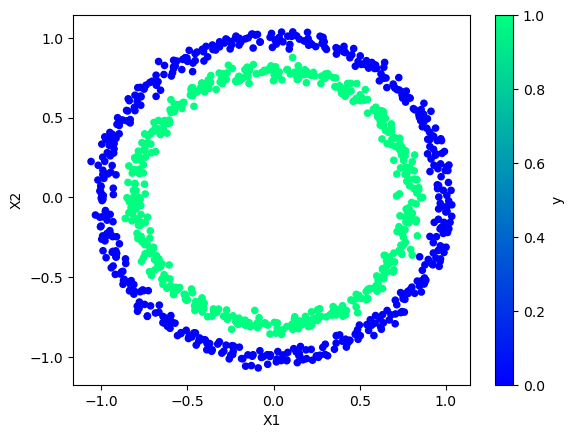

In [5]:
import matplotlib.pyplot as plt
circles.plot(kind='scatter', x='X1', y='X2', c='y', cmap=plt.cm.get_cmap("winter"));

**Note:** The data we're working with is often referred to as a toy dataset, a dataset that is small enough to experiment but still sizable enough to practice the fundamentals.

### 1.1 Check input and output shapes

In [6]:
X.shape, y.shape

((1000, 2), (1000,))

In [7]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [8]:
X_sample = X[0]
y_sample = y[0]

print (f"Values for one sample of X: {X_sample} and the same for y: {y_sample}")
print (f"Shapes for one sample of X: {X_sample.shape} and the same for y: {y_sample.shape}")

Values for one sample of X: [0.75424625 0.23148074] and the same for y: 1
Shapes for one sample of X: (2,) and the same for y: ()


In [9]:
import torch
torch.__version__

'2.7.1'

In [10]:
# Turn data into tensors
X = torch.Tensor(X).float()
y = torch.Tensor(y).float()

In [11]:
X.dtype, y.dtype

(torch.float32, torch.float32)

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
len(X_train), len(y_train), len(X_test), len(y_test)

(800, 800, 200, 200)

In [14]:
n_samples

1000

## 2. Building a model

Let's build a model to classify our blue and red dots.

Ro do so, we want to:
1. Setup device-agnostic code so our code will run on an accelerator (GPU) if there is one
2. Construct a model (by subclassing `nn.Module`
3. Define a loss function and optimizer
4. Create a training and test loop

In [15]:
# Import PyTorch and nn
import torch
from torch import nn

# Make device-agnostic code
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

In [16]:
X_train

tensor([[ 0.6579, -0.4651],
        [ 0.6319, -0.7347],
        [-1.0086, -0.1240],
        ...,
        [ 0.0157, -1.0300],
        [ 1.0110,  0.1680],
        [ 0.5578, -0.5709]])

Now we've set up device-agnostic code, let's create a model that:

1. Subclasses `nn.Module` (almost all models in PyTorch subclass `nn.Module`)
2. Create 2 `nn.Linear()` layers that are capable of handling the shapes of our data
3. Defines a `forward()` method that outlines the forward pass (or forward computation) of the model
4. Instantiate an instance of our model class and send it to the target `device`

In [17]:
X_train.shape

torch.Size([800, 2])

In [18]:
# 1. Construct a model that subclasses nn.Module
class CircleModelV0(nn.Module):
    def __init__(self):
        super().__init__()
        # 2. Create 2 nn.Linear Layers capable of handling the shape of our data
        self.layer_1 = nn.Linear(in_features=2, out_features=5, bias=True) # takes in 2 features and upscales to 5 features
        self.layer_2 = nn.Linear(in_features=5, out_features=1, bias=True) # takes in 5 features from the previous layer and outputs a single feature (same as y)
        self.two_linear_layers = nn.Sequential(
            nn.Linear(in_features=2, out_features=5),
            nn.Linear(in_features=5, out_features=1)
        )

    # 3. Define a forward() method that outlines the forward pass
    def forward(self, x):
        return self.two_linear_layers(x)

# 4. Instantiate an instance of our model class and send it to the target device
model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
  (two_linear_layers): Sequential(
    (0): Linear(in_features=2, out_features=5, bias=True)
    (1): Linear(in_features=5, out_features=1, bias=True)
  )
)

In [19]:
device

device(type='cpu')

In [20]:
next(model_0.parameters()).device

device(type='cpu')

In [21]:
# Let's replicate the model above using nn.Sequential
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1),
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [33]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.5264,  0.3713],
                      [ 0.2870,  0.0874],
                      [ 0.2526, -0.1239],
                      [ 0.6845, -0.0109],
                      [ 0.4201,  0.0148]])),
             ('0.bias', tensor([ 0.3348,  0.5233, -0.2899,  0.1221,  0.2461])),
             ('1.weight',
              tensor([[ 0.3454, -0.1999,  0.2621, -0.0701, -0.0423]])),
             ('1.bias', tensor([0.1094]))])

In [32]:
# Make predictions
with torch.inference_mode():
    untrained_preds = model_0(X_test.to(device))
print(f'Length of untrained predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}')
print(f'Length of test samples: {len(X_test)}, Shape: {X_test.shape}')
print(f'\nFirst 5 samples of untrained predictions:\n {torch.round(untrained_preds[:10])}')
print(f'\nFirst 5 samples of labels:\n {y_test[:10]}')

Length of untrained predictions: 200, Shape: torch.Size([200, 1])
Length of test samples: 200, Shape: torch.Size([200, 2])

First 5 samples of untrained predictions:
 tensor([[0.],
        [0.],
        [-0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [-0.],
        [0.]])

First 5 samples of labels:
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


In [28]:
X_test[:5], y_test[:5]

(tensor([[-0.3752,  0.6827],
         [ 0.0154,  0.9600],
         [-0.7028, -0.3147],
         [-0.2853,  0.9664],
         [ 0.4024, -0.7438]]),
 tensor([1., 0., 1., 0., 1.]))

### 2.1 Setup loss function and optimizer

WHich loss function or optimizer should you use?

Again... This is problem-specific.

For example, for regression, you might want MAE or MSE (mean absolute error or mean squared error).

For classification, you might want binary cross entropy or categorical cross-entropy (cross entropy)

As a reminder, the loss function measures how *wrong* your models predictions are.

And for optimizers, two of the most common and useful are SGD and Adam, however, PyTorch has many built-in options.

* For some common choices of loss functions and optimizers - https://www.learnpytorch.io/02 pytorch classification/#21-setup-loss-function-and-optimizer
* For the loss function, we're going to use `torch.nn.BECWithLogitsloss()`, for more on what binary cross entropy (BCE) is, check out this article—https://towardsdatascience.com/understanding-binary-cross-entropy-log-loss-a-visual-explanation-a3ac6025181a
* For a definition on what a logit is in deep learning - https://stackoverflow.com/a/52111173/7900723
* For different optimizers see `torch.optim`

In [34]:
# Set up the loss function
# loss_fn = nn.BCELoss() # BCELoss = requires inputs to have gone through the sigmoid activation function prior to input to BCELoss
loss_fn = nn.BCEWithLogitsLoss() # BCEWithLogitsLoss = sigmoid activation function built-in

optimizer = torch.optim.SGD(model_0.parameters(), lr=0.001)

In [62]:
# Calculate accuracy - out of 100 examples, what percentage does our model get right
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    acc = (correct / len(y_pred)) * 100
    return acc

## 3. Train model

To train our model, we're going to need to build a training loop with the following steps:

1. Forward pass
2. Calculate the loss
3. Optimizer zero grad
4. Loss backward (backpropagation)
5. Optimizer (gradient descent)

### 3.1 Going from raw logits -> prediciton pobabilities -> prediction labels

Our model outputs are going to be raw **logits**.

We can convert these **logits** into **prediction probabilities** by passing them to some kind of activation function (e.g., sigmoid for binary classification and softmax for multiclass classification).

Then we can convert our model's prediction probabilities to **prediction labels** by either rounding them or taking the `argmax()`.

In [42]:
# View the first 5 outputs of the forward pass on the test data
model_0.eval()
with torch.inference_mode():
    y_logits = model_0(X_test.to(device))

y_logits[:5]

tensor([[ 0.0322],
        [ 0.1027],
        [-0.0870],
        [ 0.0657],
        [ 0.0174]])

In [44]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [47]:
# Use the sigmoid activation function on our model logits to turn them into prediction probabilities
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs[:5]

tensor([[0.5080],
        [0.5257],
        [0.4783],
        [0.5164],
        [0.5043]])

For our prediction probability values, we need to perform a range-style rounding on them:
* `y_pred_probs` >= 0.5, `y=1` (class 1)
* `y_pred_probs` < 0.5 `y=0` (class 0)

In [56]:
# find the predicted labels
y_preds = torch.round(y_pred_probs)

# In full
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))))

# Check for equality
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

# Get rid of extra dimention
y_pred_labels.squeeze()

tensor([True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, Tr

tensor([1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0.,
        0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 1., 1., 0., 1., 1.,
        1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
        1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
        0., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1.,
        0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1.,
        0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0.,
        0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0.,
        0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 1.,
        0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0.,
        1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1.,
        0., 1.], grad_fn=<SqueezeBackward0>)

### 3.2 Building a training and testing loop

In [65]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set the number of epochs
EPOCHS = 1_000

# Put the data to a target device
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Build training and evaluation loop
for epoch in range(EPOCHS):
    ### Training
    model_0.train()

    # 1. Forward pass
    y_logits = model_0(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))

    # 2. Calculate the loss/accuracy
    loss = loss_fn(y_logits,
                   y_train)
    acc = accuracy_fn(y_train, y_pred)


    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward (backpropagation)
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    if epoch % 5 == 0:
        model_0.eval()
        with torch.inference_mode():
            # 1. Forward pass
            test_logits = model_0(X_test).squeeze()
            test_pred = torch.round(torch.sigmoid(test_logits))

            # 2. Test loss/acc
            loss = loss_fn(test_logits, y_test)
            acc = accuracy_fn(y_test, test_pred)

            print(f"Epoch: {epoch}, Loss: {loss}, Accuracy: {acc}")


Epoch: 0, Loss: 0.6973264813423157, Accuracy: 48.0
Epoch: 5, Loss: 0.6973235607147217, Accuracy: 48.0
Epoch: 10, Loss: 0.6973204612731934, Accuracy: 48.0
Epoch: 15, Loss: 0.6973174214363098, Accuracy: 48.0
Epoch: 20, Loss: 0.6973143815994263, Accuracy: 48.0
Epoch: 25, Loss: 0.6973114013671875, Accuracy: 48.0
Epoch: 30, Loss: 0.6973084211349487, Accuracy: 48.0
Epoch: 35, Loss: 0.6973053812980652, Accuracy: 48.0
Epoch: 40, Loss: 0.6973024010658264, Accuracy: 48.0
Epoch: 45, Loss: 0.6972994208335876, Accuracy: 48.0
Epoch: 50, Loss: 0.6972964406013489, Accuracy: 48.0
Epoch: 55, Loss: 0.6972934603691101, Accuracy: 48.0
Epoch: 60, Loss: 0.6972905993461609, Accuracy: 48.0
Epoch: 65, Loss: 0.6972876191139221, Accuracy: 48.0
Epoch: 70, Loss: 0.6972846388816833, Accuracy: 48.0
Epoch: 75, Loss: 0.6972816586494446, Accuracy: 48.0
Epoch: 80, Loss: 0.6972787380218506, Accuracy: 48.0
Epoch: 85, Loss: 0.6972757577896118, Accuracy: 48.0
Epoch: 90, Loss: 0.6972728967666626, Accuracy: 48.0
Epoch: 95, Los

## 4. Make predictions and evaluate the model

From the metrics it looks like our model isn't learning anything...

So to inspect it let's make some predictions and make them visual!

In other words, "Visualize, visualize, visualize!"

To do so, we're going to import a function called `plot_decision_boundary()`

In [68]:
import requests
from pathlib import Path
# Download helper functions from Learn PyTorch repo (if it's not already downloaded)
if Path("helper_functions.py").is_file():
    print("helper_functions py already exists, skipping download")
else:
    print("Download helper functions.py")
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
    with open("helper_functions.py", "wb") as f:
        f.write(request.content)
from helper_functions import plot_predictions, plot_decision_boundary

helper_functions py already exists, skipping download


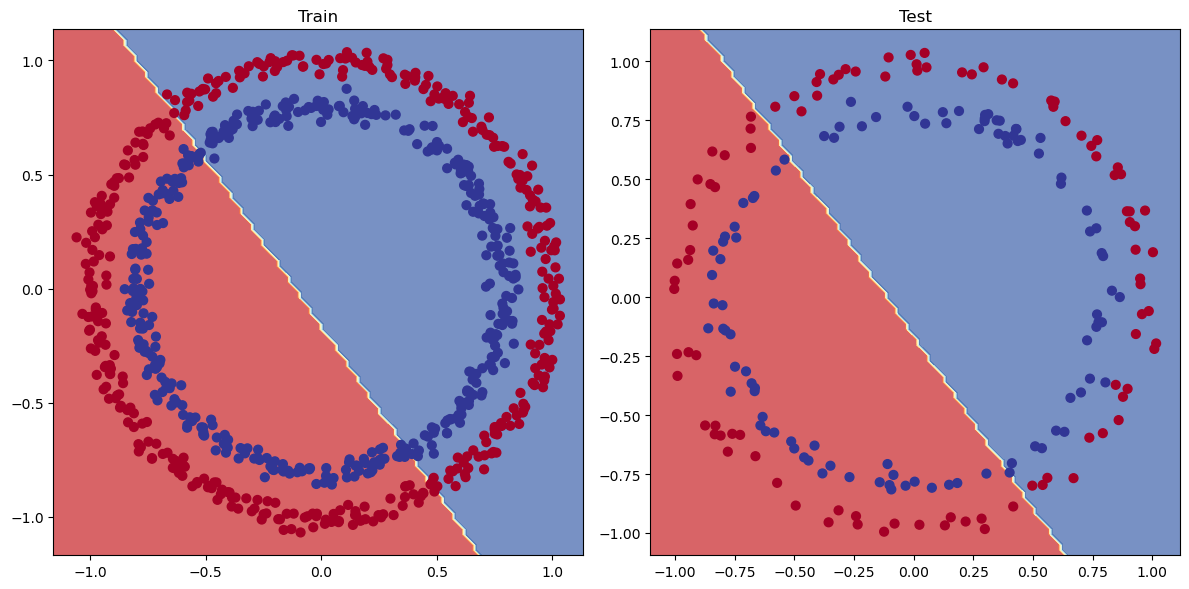

In [70]:
# Plot decision boundry of the model
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)
plt.tight_layout()
plt.show()

## 5. Improving a model (from a model perspective)
* Add more layers - give the model more chances to learn about patterns in the data
* Add more hidden units - go from 5 hidden units to 10 hidden units
* Fit for longer
* Changing the activation functions
* Change the learning rate
* Change the loss function
These options are all from a model's perspective because they deal directly with the model, rather than the data.
And because these options are all values we (as machine learning engineers and data scientists) can change, they are referred to as **hyperparameters**.

In [87]:
class CircleModelV1(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=8, bias=True)
        self.layer_2 = nn.Linear(in_features=8, out_features=4, bias=True)
        self.layer_3 = nn.Linear(in_features=4, out_features=1, bias=True)

    def forward(self, x):
        x = x ** 2  # Element-wise square
        x = torch.relu(self.layer_1(x))
        x = torch.relu(self.layer_2(x))
        return torch.relu(self.layer_3(x))

model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=8, bias=True)
  (layer_2): Linear(in_features=8, out_features=4, bias=True)
  (layer_3): Linear(in_features=4, out_features=1, bias=True)
)

In [88]:
# Create a loss function
loss_fn = nn.BCEWithLogitsLoss()

# Create an optimizer
optimizer = torch.optim.Adam(model_1.parameters(), lr=0.01)

In [89]:
# Write a training and evaluation loop for model_1
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set the number of epochs
EPOCHS = 1_000

# Put the data to a target device
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Build training and evaluation loop
for epoch in range(EPOCHS):
    ### Training
    model_1.train()

    # 1. Forward pass
    y_logits = model_1(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))

    # 2. Calculate the loss/accuracy
    loss = loss_fn(y_logits,
                   y_train)
    acc = accuracy_fn(y_train, y_pred)


    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward (backpropagation)
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    if epoch % 5 == 0:
        model_1.eval()
        with torch.inference_mode():
            # 1. Forward pass
            test_logits = model_1(X_test).squeeze()
            test_pred = torch.round(torch.sigmoid(test_logits))

            # 2. Test loss/acc
            loss = loss_fn(test_logits, y_test)
            acc = accuracy_fn(y_test, test_pred)

            print(f"Epoch: {epoch}, Loss: {loss}, Accuracy: {acc}")

Epoch: 0, Loss: 0.6902438998222351, Accuracy: 59.5
Epoch: 5, Loss: 0.6888706684112549, Accuracy: 52.0
Epoch: 10, Loss: 0.6878282427787781, Accuracy: 50.5
Epoch: 15, Loss: 0.6866954565048218, Accuracy: 51.0
Epoch: 20, Loss: 0.6853291392326355, Accuracy: 56.49999999999999
Epoch: 25, Loss: 0.684150218963623, Accuracy: 53.0
Epoch: 30, Loss: 0.6827142238616943, Accuracy: 53.5
Epoch: 35, Loss: 0.6805687546730042, Accuracy: 55.00000000000001
Epoch: 40, Loss: 0.6778502464294434, Accuracy: 56.00000000000001
Epoch: 45, Loss: 0.673999011516571, Accuracy: 55.50000000000001
Epoch: 50, Loss: 0.6686895489692688, Accuracy: 56.00000000000001
Epoch: 55, Loss: 0.6618197560310364, Accuracy: 57.49999999999999
Epoch: 60, Loss: 0.65478515625, Accuracy: 58.5
Epoch: 65, Loss: 0.6421921253204346, Accuracy: 61.0
Epoch: 70, Loss: 0.6222483515739441, Accuracy: 61.5
Epoch: 75, Loss: 0.6040864586830139, Accuracy: 67.0
Epoch: 80, Loss: 0.5712206363677979, Accuracy: 69.0
Epoch: 85, Loss: 0.5428591966629028, Accuracy: 

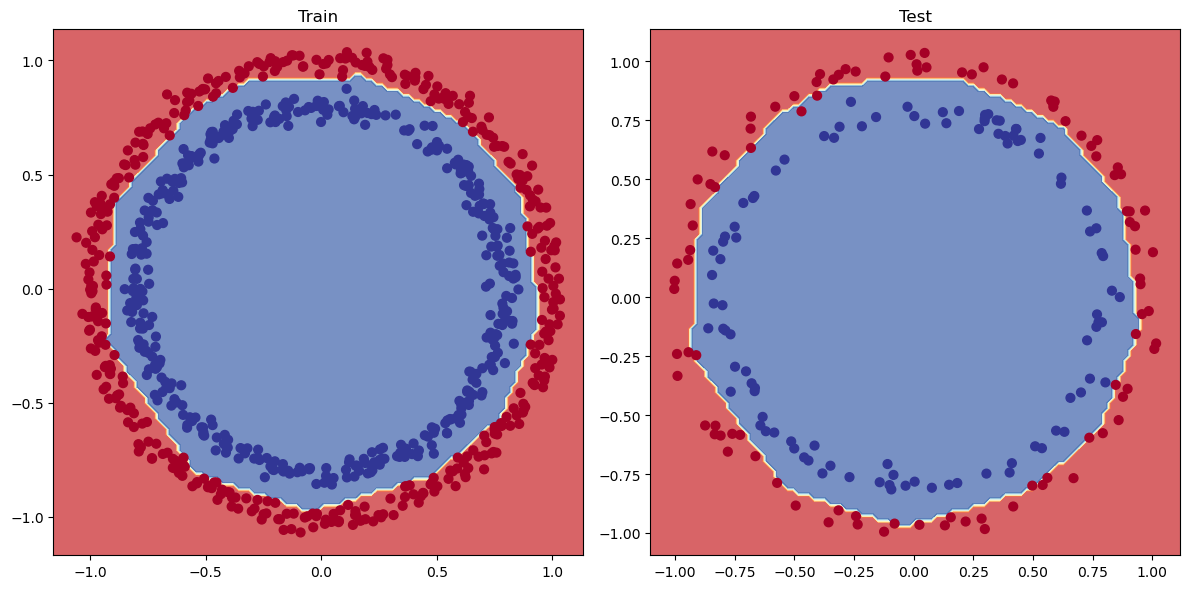

In [90]:
# Plot decision boundary of the model
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)
plt.tight_layout()
plt.show()

### 5.1 Preparing data to see if our model can fit a straight line
One way to troubleshoot to a larger problem is to test out a smaller problem.

In [ ]:
# Skiiip... already done with ReLU